In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/home/aleksey/projects/datascience/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from pandas.io.data import DataReader

/home/aleksey/projects/datascience/local/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start,  end)

In [9]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,114.650593,115.734783,113.432213,114.593636,4.857235e+07,113.547401
std,11.073649,10.909207,11.153826,10.985170,2.095531e+07,10.369656
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,107.269997,108.699997,105.650002,106.820000,3.428710e+07,106.651287
50%,115.190002,116.309998,113.699997,115.000000,4.452590e+07,113.772984
75%,125.570000,126.370003,124.580002,125.430000,5.528090e+07,123.510453
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-04-09 to 2016-04-08
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


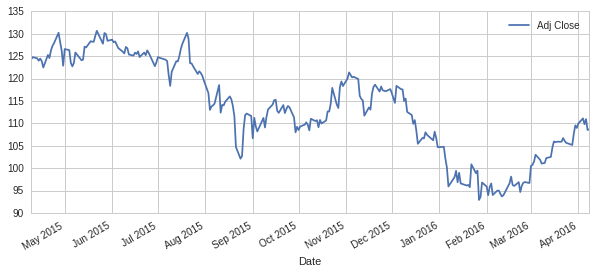

In [11]:
AAPL['Adj Close'].plot(legend = True, figsize = (10, 4))

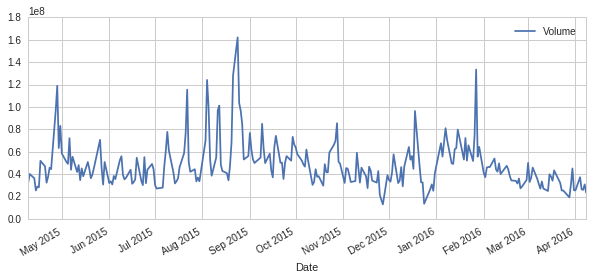

In [12]:
AAPL['Volume'].plot(legend = True, figsize = (10, 4))

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" % (str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

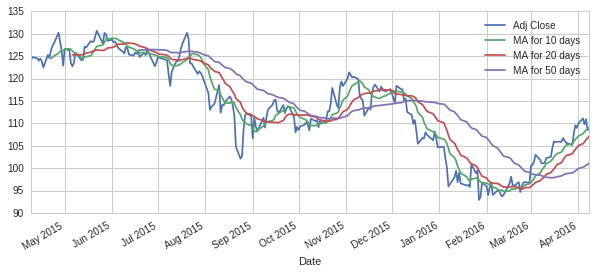

In [17]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

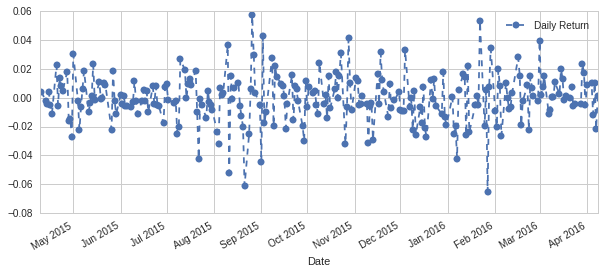

In [21]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

[(-0.1, 0.1)]

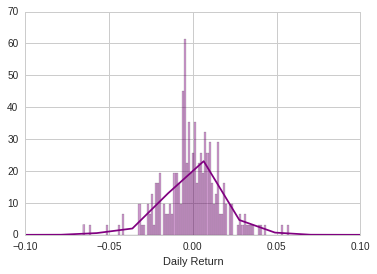

In [29]:
hist = sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')
hist.set(xlim = (-0.1, 0.1))

In [30]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [31]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-09,124.256616,383.540009,540.782472,40.378149
2015-04-10,124.786789,382.649994,540.012416,40.611776
2015-04-13,124.541339,382.359985,539.172466,40.650711
2015-04-14,124.001353,385.109985,530.392405,40.543636
2015-04-15,124.472613,383.450012,532.532429,41.137429


In [32]:
tech_rets = closing_df.pct_change()

In [33]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-09,NaN,NaN,NaN,NaN
2015-04-10,0.004267,-0.002321,-0.001424,0.005786
2015-04-13,-0.001967,-0.000758,-0.001555,0.000959
2015-04-14,-0.004336,0.007192,-0.016284,-0.002634
2015-04-15,0.003800,-0.004310,0.004035,0.014646


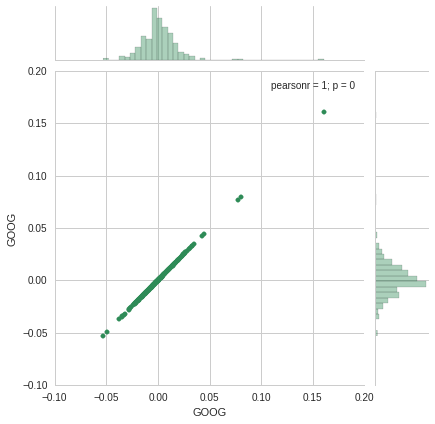

In [34]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

/home/aleksey/projects/datascience/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


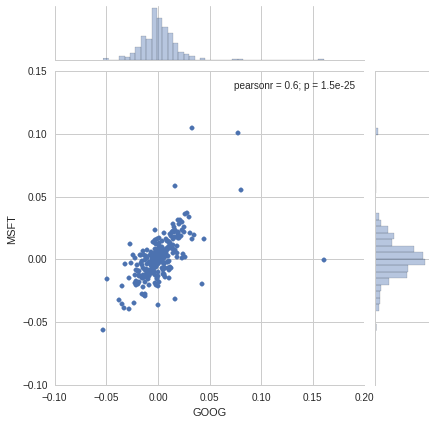

In [35]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'scatter')

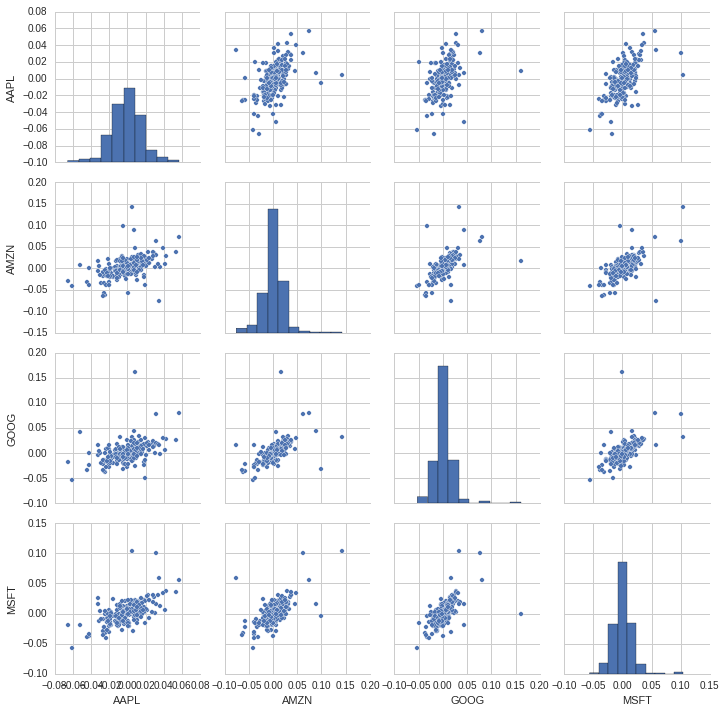

In [36]:
sns.pairplot(tech_rets.dropna())

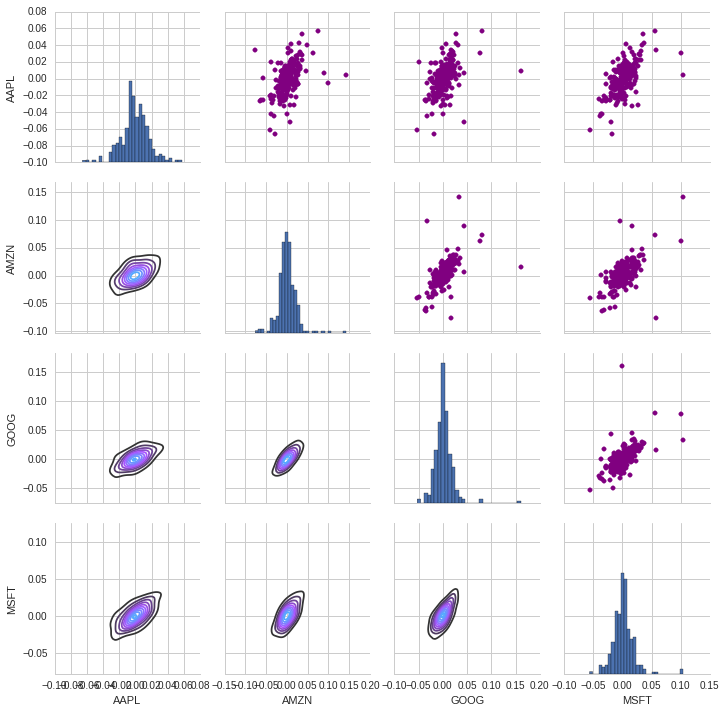

In [38]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap= 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

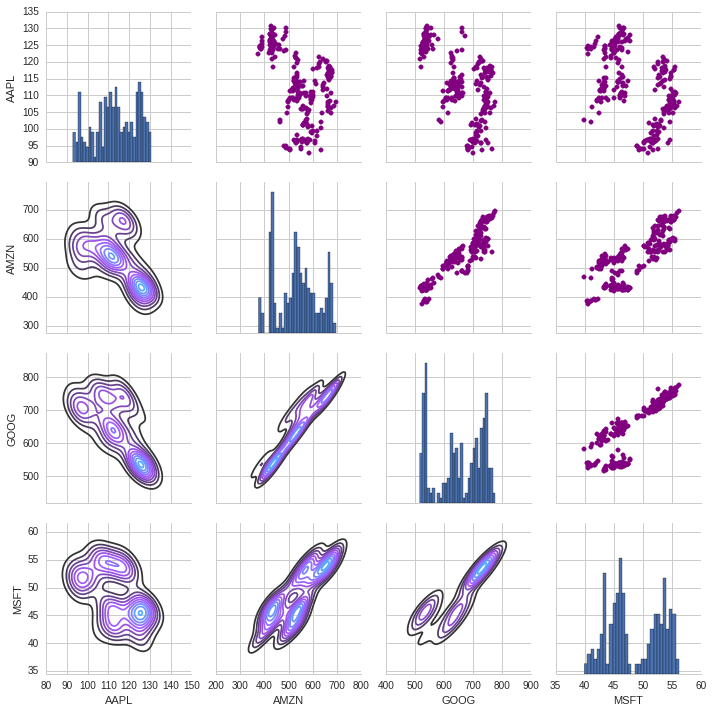

In [39]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap= 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

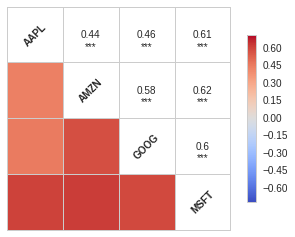

In [43]:
sns.corrplot(tech_rets.dropna(), annot = True)

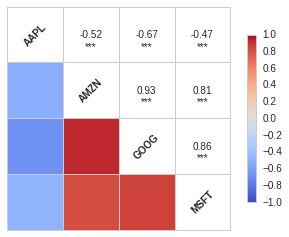

In [44]:
sns.corrplot(closing_df, annot = True)

In [45]:
# risk analysis
rets = tech_rets.dropna()

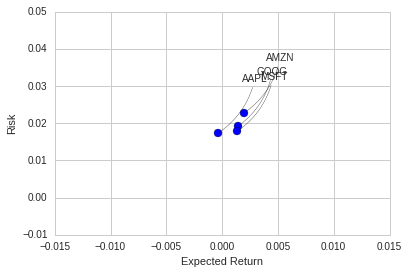

In [50]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x, y), xytext = (50, 50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.2'))